In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
 

In [2]:
df=pd.read_csv('df.csv')

In [3]:
df.head ()

,Fiscal Year Released,Recidivism Reporting Year,Race-Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivated,Years_till_recidivating
0,2020.0,2021.0,African-Swahili,25-34,C Felony,Drug,Being in posession of narcotic drugs,Mombasa,Discharged End of Sentence,Discharged End of Sentence,Yes,1.0,1.0
1,2020.0,2021.0,African-Meru,35-44,Felony - Enhanced,Drug,Being in posession of narcotic drugs,Mombasa,Discharged End of Sentence,Discharged End of Sentence,Yes,1.0,1.0
2,2019.0,2021.0,African-Luo,25-34,Aggravated Misdemeanor,Property,Obtaining money by false pretences,Mombasa,Discharged End of Sentence,Discharged End of Sentence,Yes,1.0,2.0
3,2020.0,2021.0,African-Swahili,35-44,D Felony,Violent,Grievious harm,Mombasa,Discharged End of Sentence,Discharged End of Sentence,Yes,1.0,1.0
4,2020.0,2021.0,African-Swahili,Under 25,D Felony,Violent,Assault causing actual bodily harm,Mombasa,Discharged End of Sentence,Discharged End of Sentence,Yes,1.0,1.0


In [4]:
df.drop('Years_till_recidivating', axis=1, inplace=True)

In [5]:
df.drop('Part of Target Population', axis=1, inplace=True)

In [6]:
df.drop('Main Supervising District', axis=1, inplace=True)

In [7]:
df.drop('Recidivism Reporting Year', axis=1, inplace=True)

In [8]:
df.drop('Fiscal Year Released', axis=1, inplace=True)

In [9]:


df['Release type: Paroled to Detainder united'].value_counts()


Discharged End of Sentence    449
Probation                     230
Community Service Order       219
Name: Release type: Paroled to Detainder united, dtype: int64

In [10]:
df['Release Type'].value_counts()  # These two coulmns are a duplicate so we can drop one

Discharged End of Sentence    449
Probation                     230
Community Service Order       219
Name: Release Type, dtype: int64

In [11]:
df.drop('Release type: Paroled to Detainder united', axis=1, inplace=True)

In [12]:
df.head()

,Race-Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Recidivated
0,African-Swahili,25-34,C Felony,Drug,Being in posession of narcotic drugs,Discharged End of Sentence,1.0
1,African-Meru,35-44,Felony - Enhanced,Drug,Being in posession of narcotic drugs,Discharged End of Sentence,1.0
2,African-Luo,25-34,Aggravated Misdemeanor,Property,Obtaining money by false pretences,Discharged End of Sentence,1.0
3,African-Swahili,35-44,D Felony,Violent,Grievious harm,Discharged End of Sentence,1.0
4,African-Swahili,Under 25,D Felony,Violent,Assault causing actual bodily harm,Discharged End of Sentence,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Race-Ethnicity                     898 non-null    object 
 1   Age At Release                     898 non-null    object 
 2   Convicting Offense Classification  898 non-null    object 
 3   Convicting Offense Type            898 non-null    object 
 4   Convicting Offense Subtype         898 non-null    object 
 5   Release Type                       898 non-null    object 
 6   Recidivated                        898 non-null    float64
dtypes: float64(1), object(6)
memory usage: 49.2+ KB


#### Data encoding
as seen above, 5 of the columns are of data type- object. we need to convert them to numeric so they are machine readable.
in this section we use label encoder to transform the data.

In [14]:
#Getting column names
list(df.columns.values.tolist())

['Race-Ethnicity',
 'Age At Release ',
 'Convicting Offense Classification',
 'Convicting Offense Type',
 'Convicting Offense Subtype',
 'Release Type',
 'Recidivated']

In [15]:
#Transform data to numeric (int64) 
cols = ["Race-Ethnicity",'Age At Release ',"Convicting Offense Classification","Convicting Offense Type", "Convicting Offense Subtype","Release Type"]

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

,Race-Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Recidivated
0,15,0,3,0,9,1,1.0
1,12,1,6,0,9,1,1.0
2,11,0,1,1,29,1,1.0
3,15,1,4,3,20,1,1.0
4,15,5,4,3,3,1,1.0


Next we separate the predictor and target classes

In [16]:
# Extract the predictor and target class
y=df['Recidivated']


In [17]:
x=df.drop(['Recidivated'], axis=1)

In [18]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Recidivated, dtype: float64

In [19]:
x.head()

,Race-Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type
0,15,0,3,0,9,1
1,12,1,6,0,9,1
2,11,0,1,1,29,1
3,15,1,4,3,20,1
4,15,5,4,3,3,1


In [20]:
# train using 80% and test with 20%


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, shuffle=True)

In [22]:
x_train.head()

,Race-Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type
880,12,0,3,1,32,2
740,8,2,3,0,9,0
231,12,5,4,2,19,1
388,15,5,4,3,3,1
118,12,5,4,1,24,1


In [23]:
x_test.head()

,Race-Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type
331,11,2,1,2,8,1
638,12,5,4,0,9,0
326,5,0,4,1,24,1
848,9,5,3,0,9,2
39,4,1,4,0,9,1


In [24]:
y_train.head()

880    0.0
740    0.0
231    1.0
388    1.0
118    1.0
Name: Recidivated, dtype: float64

### Model Building and Algorithm Selection

In this section we build models using different classification algorithms,evaluate and then select the algorithm that works best for this problem.

In [25]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

## 1. Logistic Regression Algorithm

In [26]:
reg = LogisticRegression(random_state = 42)


In [27]:
#Fit training data
reg.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [28]:
#Test model
y_pred = reg.predict(x_test)

In [29]:
accuracies = cross_val_score(reg, x, y, cv=5)

In [30]:
print("Model Accuracy:",np.mean(accuracies))
print("Train Score:", reg.score(x_train,y_train))
print("Test Score:",reg.score(x_test,y_test))

Model Accuracy: 0.571421477343265
Train Score: 0.6225626740947076
Test Score: 0.6


In [31]:
#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = reg.score(x_train,y_train)
result_dict_test["Logistic Test Score"] = reg.score(x_test,y_test)

## 2. KNN Classifier

In [32]:
knn = KNeighborsClassifier()

In [33]:
#Fit training data
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
#Test model
y_pred = knn.predict(x_test)

In [35]:
accuracies = cross_val_score(knn, x, y, cv=5)
#Obtain accuracy
print("Model Accuracy:",np.mean(accuracies))
print("Train Score:", knn.score(x_train,y_train))
print("Test Score:",knn.score(x_test,y_test))

Model Accuracy: 0.766225946617008
Train Score: 0.903899721448468
Test Score: 0.8777777777777778


In [36]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = knn.score(x_train,y_train)
result_dict_test["KNN Test Score"] = knn.score(x_test,y_test)

## 3. Support Vector Classifier

In [37]:
svc = SVC(random_state = 42)

In [38]:
# Fit training data
svc.fit(x_train,y_train)

SVC(random_state=42)

In [39]:
# test model
y_pred = svc.predict(x_test)

In [40]:
accuracies = cross_val_score(svc, x, y, cv=5)

#Obtain accuracy
print("Model Accuracy:",np.mean(accuracies))
print("Train Score:", svc.score(x_train,y_train))
print("Test Score:",svc.score(x_test,y_test))

Model Accuracy: 0.6259714463066418
Train Score: 0.6518105849582173
Test Score: 0.6


In [41]:
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = svc.score(x_train,y_train)
result_dict_test["SVM Test Score"] = svc.score(x_test,y_test)

## 4.Random Forest Classifier

In [42]:
rfc = RandomForestClassifier(random_state = 42)

In [43]:
# fit training data
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [44]:
# testing model
y_pred = rfc.predict(x_test)

In [45]:
accuracies = cross_val_score(rfc, x, y, cv=5)

#Obtain accuracy
print("Model Accuracy:",np.mean(accuracies))
print("Train Score:", rfc.score(x_train,y_train))
print("Test Score:",rfc.score(x_test,y_test))

Model Accuracy: 1.0
Train Score: 1.0
Test Score: 1.0


In [46]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = rfc.score(x_train,y_train)
result_dict_test["Random Forest Test Score"] = rfc.score(x_test,y_test)

## 5. Naive Bayes Classifier

In [47]:
gnb = GaussianNB()

In [48]:
#fit training data
gnb.fit(x_train,y_train)

GaussianNB()

In [49]:
# Testing model
y_pred = gnb.predict(x_test)

In [50]:
accuracies = cross_val_score(gnb, x, y, cv=5)

#Obtain accuracy
print("Model Accuracy:",np.mean(accuracies))
print("Train Score:", gnb.score(x_train,y_train))
print("Test Score:",gnb.score(x_test,y_test))

Model Accuracy: 1.0
Train Score: 1.0
Test Score: 1.0


In [51]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = gnb.score(x_train,y_train)
result_dict_test["Gaussian NB Test Score"] = gnb.score(x_test,y_test)

## 6. Decision Tree Classifier

In [52]:
dtc = DecisionTreeClassifier(random_state = 42)

In [53]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred = dtc.predict(x_test)

In [55]:
accuracies = cross_val_score(dtc, x, y, cv=5)

#Obtain accuracy
print("Model Accuracy:",np.mean(accuracies))
print("Train Score:", dtc.score(x_train,y_train))
print("Test Score:",dtc.score(x_test,y_test))

Model Accuracy: 1.0
Train Score: 1.0
Test Score: 1.0


In [56]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = dtc.score(x_train,y_train)
result_dict_test["Decision Tree Test Score"] = dtc.score(x_test,y_test)

## Comparing accuracies

In [57]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,0.622563
KNN Train Score,0.903900
SVM Train Score,0.651811
Random Forest Train Score,1.000000
Gaussian NB Train Score,1.000000
Decision Tree Train Score,1.000000


In [58]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Test Score,0.600000
KNN Test Score,0.877778
SVM Test Score,0.600000
Random Forest Test Score,1.000000
Gaussian NB Test Score,1.000000
Decision Tree Test Score,1.000000


## Visualizing the accuracy scores

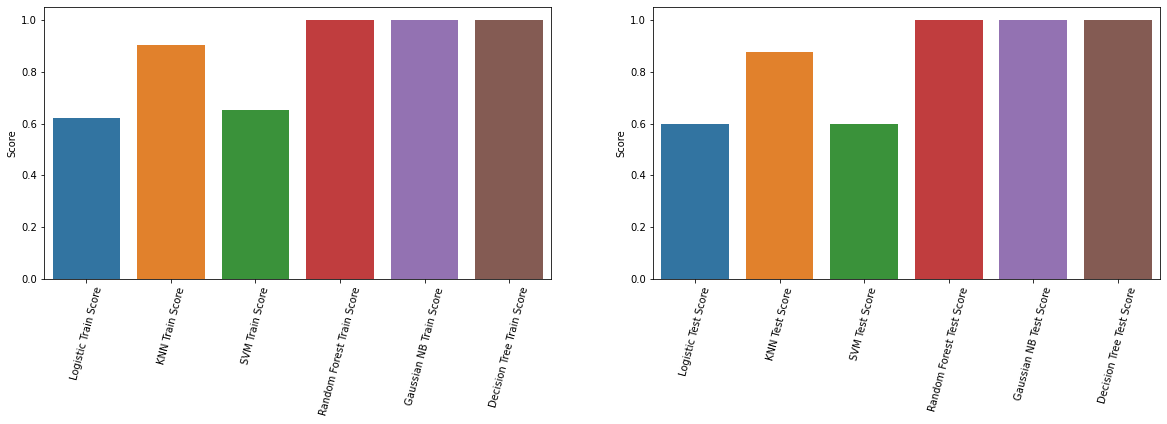

In [59]:
import seaborn as sns
 
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

### Assessing feature importance for the top 4 performing Algorithms

In [60]:
from sklearn.inspection import permutation_importance

#### Decision Tree Algorithm

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.48524
***************************
Feature Key
Feature (0, 'Race-Ethnicity')
Feature (1, 'Age At Release ')
Feature (2, 'Convicting Offense Classification')
Feature (3, 'Convicting Offense Type')
Feature (4, 'Convicting Offense Subtype')
Feature (5, 'Release Type')


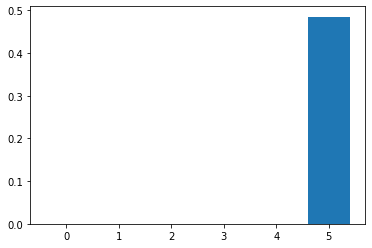

In [61]:
# performing permutation importance
results = permutation_importance(dtc, x_train,y_train,scoring='accuracy')
# getting importance
dtcimportance = results.importances_mean
# summarizing feature importance
for i,v in enumerate(dtcimportance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
#Creating a Key for the features since the permutation_importance function gives returns column indexes
key = list(zip([i for i in range(len(x_train.columns))], x_train.columns.values,))

print ("***************************")
print ('Feature Key')

for k in key:
    print("Feature",k)

    
# plotting feature importance
plt.bar([x for x in range(len(dtcimportance))], dtcimportance)
plt.show()

The algorithm's most important features is the Release type

#### Naive Bayes

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.50084
***************************
Feature Key
Feature (0, 'Race-Ethnicity')
Feature (1, 'Age At Release ')
Feature (2, 'Convicting Offense Classification')
Feature (3, 'Convicting Offense Type')
Feature (4, 'Convicting Offense Subtype')
Feature (5, 'Release Type')


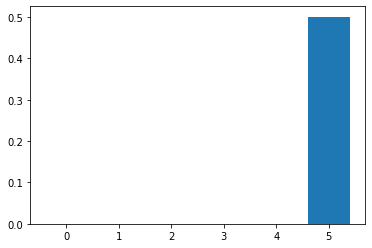

In [62]:
# perform permutation importance
results = permutation_importance(gnb, x_train,y_train,scoring='accuracy')
# get importance
gnbimportance = results.importances_mean
# summarize feature importance
for i,v in enumerate(gnbimportance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
#Creating a Key for the features since the permutation_importance function gives returns column indexes
key = list(zip([i for i in range(len(x_train.columns))], x_train.columns.values,))

print ("***************************")
print ('Feature Key')

for k in key:
    print("Feature",k)

    
# plot feature importance
plt.bar([x for x in range(len(gnbimportance))], gnbimportance)
plt.show()

#### Random Forest

Feature: 0, Score: 0.06490
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.41421
***************************
Feature Key
Feature (0, 'Race-Ethnicity')
Feature (1, 'Age At Release ')
Feature (2, 'Convicting Offense Classification')
Feature (3, 'Convicting Offense Type')
Feature (4, 'Convicting Offense Subtype')
Feature (5, 'Release Type')


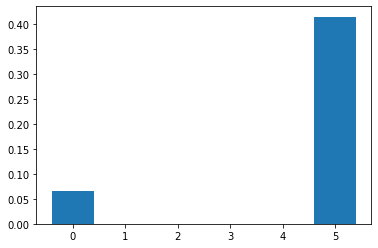

In [63]:
# perform permutation importance
results = permutation_importance(rfc, x_train,y_train,scoring='accuracy')
# get importance
rfcimportance = results.importances_mean
# summarize feature importance
for i,v in enumerate(rfcimportance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
#Creating a Key for the features since the permutation_importance function gives returns column indexes
key = list(zip([i for i in range(len(x_train.columns))], x_train.columns.values,))

print ("***************************")
print ('Feature Key')

for k in key:
    print("Feature",k)

    
# plot feature importance
plt.bar([x for x in range(len(rfcimportance))], rfcimportance)
plt.show()

The algorithm's important features are release type and Ethnicity

### KNN

Feature: 0, Score: 0.24763
Feature: 1, Score: 0.14290
Feature: 2, Score: 0.08719
Feature: 3, Score: 0.00501
Feature: 4, Score: 0.22117
Feature: 5, Score: 0.04903
***************************
Feature Key
Feature (0, 'Race-Ethnicity')
Feature (1, 'Age At Release ')
Feature (2, 'Convicting Offense Classification')
Feature (3, 'Convicting Offense Type')
Feature (4, 'Convicting Offense Subtype')
Feature (5, 'Release Type')


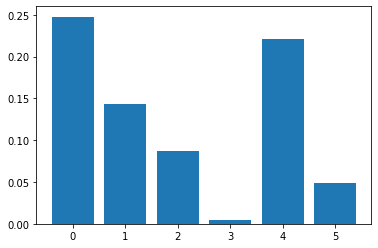

In [64]:
# perform permutation importance
results = permutation_importance(knn, x_train,y_train,scoring='accuracy')
# get importance
knnimportance = results.importances_mean
# summarize feature importance
for i,v in enumerate(knnimportance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
#Creating a Key for the features since the permutation_importance function gives returns column indexes
key = list(zip([i for i in range(len(x_train.columns))], x_train.columns.values,))

print ("***************************")
print ('Feature Key')

for k in key:
    print("Feature",k)

    
# plot feature importance
plt.bar([x for x in range(len(knnimportance))], knnimportance)
plt.show()

Ethnicity, Age at release and convicting offense subtype are the most important features.

### Linear Regression

Feature: 0, Score: 0.08635
Feature: 1, Score: 0.00836
Feature: 2, Score: 0.01643
Feature: 3, Score: -0.00195
Feature: 4, Score: -0.00279
Feature: 5, Score: -0.00223
***************************
Feature Key
Feature (0, 'Race-Ethnicity')
Feature (1, 'Age At Release ')
Feature (2, 'Convicting Offense Classification')
Feature (3, 'Convicting Offense Type')
Feature (4, 'Convicting Offense Subtype')
Feature (5, 'Release Type')


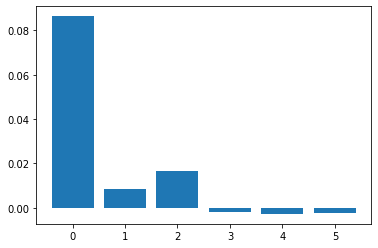

In [65]:
# perform permutation importance
results = permutation_importance(reg, x_train,y_train,scoring='accuracy')
# get importance
regimportance = results.importances_mean
# summarize feature importance
for i,v in enumerate(regimportance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
#Creating a Key for the features since the permutation_importance function gives returns column indexes
key = list(zip([i for i in range(len(x_train.columns))], x_train.columns.values,))

print ("***************************")
print ('Feature Key')

for k in key:
    print("Feature",k)

    
# plot feature importance
plt.bar([x for x in range(len(regimportance))], regimportance)
plt.show()

### SVC

Feature: 0, Score: 0.11838
Feature: 1, Score: -0.00028
Feature: 2, Score: 0.00251
Feature: 3, Score: -0.00362
Feature: 4, Score: 0.02117
Feature: 5, Score: -0.00111
***************************
Feature Key
Feature (0, 'Race-Ethnicity')
Feature (1, 'Age At Release ')
Feature (2, 'Convicting Offense Classification')
Feature (3, 'Convicting Offense Type')
Feature (4, 'Convicting Offense Subtype')
Feature (5, 'Release Type')


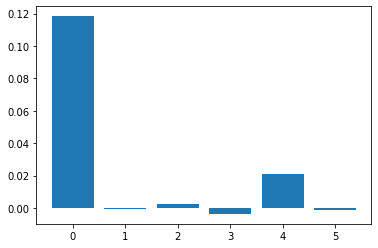

In [66]:
# perform permutation importance
results = permutation_importance(svc, x_train,y_train,scoring='accuracy')
# get importance
svcimportance = results.importances_mean
# summarize feature importance
for i,v in enumerate(svcimportance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
#Creating a Key for the features since the permutation_importance function gives returns column indexes
key = list(zip([i for i in range(len(x_train.columns))], x_train.columns.values,))

print ("***************************")
print ('Feature Key')

for k in key:
    print("Feature",k)

    
# plot feature importance
plt.bar([x for x in range(len(svcimportance))], svcimportance)
plt.show()

### Summary on important features, accuracies and algorithm selection

Decision tree, Naive Bayes and Random Forest algorithms' most important feature is Release Type. It is the only important feature for Decision tree and Naive Bayes.Indeed on checking data, all of the offenders that recidivated, the release type was 'discharged end of sentence' (The the other release types are Probation and community service order).This could be because they are no longer under the supervision of authorities.It is also the reason why the models had an accuracy of 100 % because they classified every offender with release type "Discharged end of sentence" as 'recidivated'.

However, this problem is more complex than that and release type alone can not determine a recidivism candidate. It may be true that all or majority of offenders that recidivate had been 'discharged end of sentence' but not all offenders 'discharged end of sentence' recidivate. For this reasons we discard these 2 algorithms and consider the ones that found a number of other features to be important.

Random forest identified Ethnicity as an important feature in addition to release type. We still drop it because it has considered release type as the most important feature for prediction (0.6), assigning a very low,almost negligible score (0.04) to ethnicity

The other three algorithms'(Knn,Logistic Regression and svc) most important features are ethnicity,Convicting Offense Subtype and age at release, in varying degrees. For these algorithms Ethnicity ranks highest as an important feature. It is interesting to note that 4 out of 6 algorithms flagged Ethnicity as an important feature.

We choose to work with knn since it had the higest accuracy out of the 3, with training score of 90% and a test score of 87%.The top three important features are ethnicity, convicting offense sub-type and age at release.

### Working with KNN model and Hyperparameter Tuning

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

### Basic info about the model

In [68]:
print('Classes: ', knn.classes_)
print('Effective Metric: ', knn.effective_metric_)
print('Effective Metric Params: ', knn.effective_metric_params_)
print('No. of Samples Fit: ', knn.n_samples_fit_)
print("")
print('***********Model Accuracy*****************************')
accuracies= cross_val_score(knn, x, y, cv=5)
print("Model Accuracy Score:",np.mean(accuracies))
print('--------------------------------------------------------')
print("")
print('*************** Evaluation on Test Data ***************')
scoreC_te = knn.score(x_test, y_test)
print('Accuracy Score: ', scoreC_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))
#print('--------------------------------------------------------')
print("")

pred_tr=knn.predict(x_train)

print('*************** Evaluation on Training Data ***************')
scoreC_tr = knn.score(x_train, y_train)
print('Accuracy Score: ', scoreC_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_tr))
print('---------------------------------------------------------')

print('***************ROC SCORE**********************************')
#performance of model with ROC Score.
print("ROC AUC Score:",roc_auc_score(y_test, y_pred))
print('-----------------------------------------------------------')
print("")

print('************Feature importance*****************************')
# perform permutation importance
results = permutation_importance(knn, x_train,y_train,scoring='accuracy')
# get importance
knnimportance = results.importances_mean
# summarize feature importance
for i,v in enumerate(knnimportance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
#Creating a Key for the features since the permutation_importance function gives returns column indexes
key = list(zip([i for i in range(len(x_train.columns))], x_train.columns.values,))

print ("***************************")
print ('Feature Key')

for k in key:
    print("Feature",k)


Classes:  [0. 1.]
Effective Metric:  euclidean
Effective Metric Params:  {}
No. of Samples Fit:  718

***********Model Accuracy*****************************
Model Accuracy Score: 0.766225946617008
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8777777777777778
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00        95

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


*************** Evaluation on Training Data ***************
Accuracy Score:  0.903899721448468
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90       364
         1.0       0.84      1.00      0.91       354

    accuracy                           0.90       718
   macro avg

The model's performance is 0.87 and 0.90 accuracy for testing and training data, respectively. In the next section we try and check whether performance can improve by adjusting hyperparameters.We will use GridsearchCV to build multiple models using different combinations of hyperparameters and see which combination performs best.

##### list of hyperparameters that we check
1. n_neighbors: determine the best k values
2. Weights: Determine whether adding weights to the data points will be beneficial to the model or not
3. metric: Determine the distance metric to be used; whether Euclidean, manhattan or minkowsi


In [69]:
from sklearn.model_selection import GridSearchCV


In [70]:
#dictionary of hyperparameters we want to tune
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [71]:
# create a new knn object
knn_2=KNeighborsClassifier()

In [72]:
# evaluate model with different hyperparameters using gridsearch
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [73]:
#fit the model on our train set
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [74]:
# find the best score
g_res.best_score_

0.8816073919107392

In [75]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [76]:
# using the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance',algorithm = 'auto',metric = 'manhattan')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [77]:
#get a prediction
pred_tr = knn.predict(x_train)
y_pred= knn.predict(x_test)

##### Model Evaluation

In [78]:
#Using cross_val_score
accuracies = cross_val_score(knn, x, y, cv=5)
#Obtain accuracy
print("Train Score:",np.mean(accuracies))

Train Score: 0.8118435754189944


The value before tuning for cross_val accuracy was 0.7662; it has therefore improved

In [79]:
#using Score function


In [80]:
print('*************** Evaluation on Test Data ***************')
scoreC_te = knn.score(x_test, y_test)
print('Accuracy Score: ', scoreC_te)

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9333333333333333


In [81]:
print('*************** Evaluation on Training Data ***************')
scoreC_tr = knn.score(x_train, y_train)
print('Accuracy Score: ', scoreC_tr)

*************** Evaluation on Training Data ***************
Accuracy Score:  1.0


The previous values for classification report were test-0.8777 and train-0.903; they have improved

In [82]:
#using accuracy_score

In [83]:
print('Training set accuracy: ',accuracy_score(y_train, pred_tr))
print('Test set accuracy: ',accuracy_score(y_test, y_pred))

Training set accuracy:  1.0
Test set accuracy:  0.9333333333333333


The values of accuracy_score are the same as from the score function

In [84]:
# classification report
print(classification_report(y_test, y_pred))
print(classification_report(y_train, pred_tr))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        85
         1.0       0.89      1.00      0.94        95

    accuracy                           0.93       180
   macro avg       0.94      0.93      0.93       180
weighted avg       0.94      0.93      0.93       180

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       364
         1.0       1.00      1.00      1.00       354

    accuracy                           1.00       718
   macro avg       1.00      1.00      1.00       718
weighted avg       1.00      1.00      1.00       718



In [85]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[73 12]
 [ 0 95]]


In [86]:
# AUC-ROC
roc_auc_score(y_test, y_pred)


0.9294117647058824

### Saving the model

In [89]:
import joblib

In [90]:
filename='final_model.joblib'
joblib.dump(knn,filename)

['final_model.joblib']